<a href="https://colab.research.google.com/github/tnqlstnqls/school-colab/blob/main/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%AA%A8%EB%8D%B8_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**패션 아이템 분류하기👔🕶️🩳🧦**
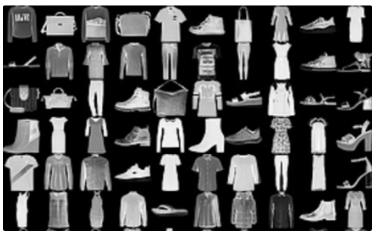

이 데이터는 총 70,000개의 패션 아이템 이미지가 들어 있습니다.  
우리는 이 이미지를 인공지능에게 학습시켜서 각 패션 아이템이 어느 종류에 속하는지 분류해보고자 합니다.

패션 아이템은 아래와 같이 10가지 범주로 분류됩니다. 각각의 범주는 0~9까지의 숫자 레이블로 구성됩니다.

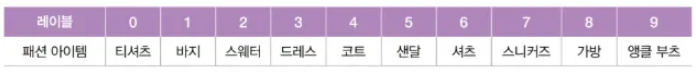

이게 타깃이자 종속 변수가 되겠네요.

###**데이터 수집**
우선 데이터를 불러와볼까요?  
패션 MNIST 데이터는 워낙 유명해서 딥러닝 라이브러리에서 데이터를 가져올 수 있습니다.  
우리는 케라스(keras)를 이용해 데이터를 불러오겠습니다.

🔎 **케라스(Keras)**란?
- 딥러닝을 쉽게 만들 수 있도록 도와주는 도구
- 그래프를 출력할 때 matplotlib, seaborn 라이브러리를 쓰듯이 딥러닝 모델을 구현하려면 keras 라이브러리를 선언해야 한다.

데이터를 불러와 훈련(train) 데이터와 테스트(test) 데이터로 나누고, 이를 입력(input)과 타깃(target)으로 나눠봅시다.

In [ ]:
import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


데이터의 크기를 확인해볼까요? 우선 train 데이터의 크기를 확인해봅시다.

✅ shape(): 데이터의 크기를 출력하는 함수

In [ ]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


- train_input은 60,000개의 이미지를 갖고 있으며, 각 이미지는 28 * 28 크기이다.
- train_target은 60,000개의 이미지를 갖고 있다.
- train_target은 이미지가 아닌 0~9까지의 레이블만 담겨있기 때문에 가로 세로 크기가 나오지 않는다.

test 데이터의 크기도 확인해봅시다.

train 데이터에서 몇 개의 샘플만 출력해봅시다.

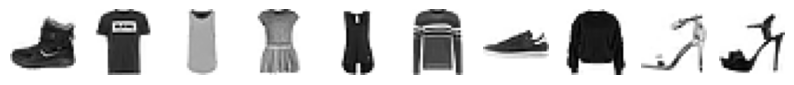

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

위 샘플들의 타깃(target)값을 확인해봅시다.

In [ ]:
print(train_target[:10])

[9 0 0 3 0 2 7 2 5 5]


###**데이터 전처리**
이미지 데이터를 딥러닝에 적합한 형태로 전처리합니다. 전처리에서는 다음과 같은 내용을 수행합니다.
- 차원 변환
- 정규화

**차원 변환**


---



이미지는 2차원 데이터이지만 모델은 1차원으로 입력 받습니다. 따라서 이미지를 1차원으로 변환해야 합니다.  

❓**차원 변환을 하는 이유**

- 신경망은 2차원 데이터를 읽지 못함
- 계산이 쉬워짐


train_input과 test_input을 차원 변환해봅시다.

✅ reshape(): 다차원 배열을 새로운 형태로 재구성하는데 사용하는 함수
- -1 : 이미지 개수를 자동으로 계산
- 28*28 : 이미지 크기 지정

In [ ]:
train_flatten = train_input.reshape(-1,28*28)
print(train_input.shape, train_flatten.shape)
test_flatten = test_input.reshape(-1,28*28)
print(test_input.shape, test_flatten.shape)

(60000, 28, 28) (60000, 784)
(10000, 28, 28) (10000, 784)


**정규화**


---


정규화는 데이터를 특정 범위로 조정하여 값들이 일정한 스케일을 갖도록 하는 과정입니다.


❓**정규화가 필요한 이유**
- 픽셀값은 0~255 사이의 범위를 갖는데, 신경망 입장에서는 여전히 값이 크다.
- 값의 범위가 작고 일정하면 안정적인 학습, 계산 속도 향상이 가능하다.
- 따라서 이미지를 전처리할 때는 0 ~ 1사이의 값으로 정규화를 한다.


픽셀의 최대값인 255로 나눠 0~1사이의 값으로 정규화해봅시다.


In [ ]:
train_scaled = train_flatten / 255.0
test_scaled = test_flatten / 255.0
train_scaled[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

###**인공신경망 모델 만들기**
인공신경망 모델 구성 단계는 다음과 같습니다.
1. 입력층 정의
2. 밀집층 정의
3. 모델 만들기
4. 모델 설정하기
5. 모델 훈련하기
6. 성능 확인하기

한 단계씩 진행하겠습니다.

**입력층 정의**

입력층에선 모델이 학습할 **데이터의 형태와 크기**를 지정합니다.   
입력층을 정의할 때는 **Input()** 함수를 사용합니다.

💡 케라스에서 층을 정의한다면?  
- 케라스에서 층을 정의할 때에는 layers 모듈을 사용합니다. layers 모듈 안에는 미리 만들어 놓은 다양한 층이 준비되어 있습니다.




In [ ]:
inputs = keras.layers.Input(shape=(784,))

**밀집층 정의**

밀집층은 신경망에서 가장 기본이 되는 층입니다. 선이 밀집되어 있어 밀집층이라고 부릅니다.  
밀집층에선 **뉴런 수**와 **활성화 함수**를 설정합니다.
밀집층을 정의할 때에는 **Dense 클래스**를 사용합니다.

❓ 소프트맥스(softmax) 함수란?
- 다중 분류에 사용하는 활성화 함수입니다.
- 다중 분류란 분류하고자 하는 레이블이 여러개인 경우를 의미합니다.

In [ ]:
dense = keras.layers.Dense(10,activation='softmax')

**모델 만들기**

정의한 층들을 순서대로 연결하여 인공신경망 구조를 완성합니다.  
모델을 만들 때에는 **Sequential 클래스**를 사용합니다.

👉 여기서 만든 model 객체가 바로 신경망 모델입니다!

In [ ]:
model = keras.Sequential([inputs, dense])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

**모델 설정하기**

케라스는 모델을 훈련하기 전에 설정 단계가 있습니다.  
설정은 **compile() 메서드**에서 수행합니다.  
손실 함수, 평가 지표 등을 지정하는데요. 여기서 꼭 지정해야 할 것은 **손실 함수의 종류**입니다 !

우리는 손실 함수와 평가 지표를 지정해보겠습니다. 지정 조건은 다음과 같습니다.
- loss(손실 함수): sparse_categorical_crossentropy ➡️ 다중 분류에서 사용하는 손실 함수
- metrics(평가 지표): accracy(정확도) 추가

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**모델 훈련하기**

준비된 데이터를 이용해 모델을 훈련시킵니다. 훈련은 **fit()** 메서드로 수행합니다.    
처음 두 매개변수에 입력(train_scaled)과 타깃(train_target)을 지정합니다.   
그 다음에 반복할 **에포크(epochs)** 횟수를 지정합니다.

In [ ]:
model.fit(train_scaled,train_target, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7471 - loss: 0.7460
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8402 - loss: 0.4721
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8458 - loss: 0.4527
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8496 - loss: 0.4353
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8566 - loss: 0.4227


**성능 확인하기**

테스트(test) 데이터로 모델 성능을 확인해봅시다.  
모델의 성능을 평가하는 메서드는 **evaluate()**입니다.  

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8436 - loss: 0.4553


[0.4665577709674835, 0.8391000032424927]